In [98]:
from keras.models import Input, Model
from keras.layers import Dense
from keras.datasets.mnist import load_data
from keras import backend as K
import numpy as np

In [99]:
(x_train, _), (x_test, _) = load_data()
x_train = x_train/255
x_train = x_train.reshape(-1, 784)

In [100]:
x_input = Input(shape=(784,))
encoder = Dense(32, activation='relu')(x_input)
decoder = Dense(784, activation='sigmoid')(encoder)

In [101]:
encode = Model(x_input, encoder)
sparse_autoencoder = Model(x_input, decoder)

In [102]:
beta = 0.05
rho= 0.05

In [103]:
def loss(y, y_pred):
    
    hidden_activation = np.sum(encode.predict(x_train), axis=0)/x_train.shape[0]
    kl = 0
    for i in range(32):
        kl+= rho*np.log(rho/hidden_activation[i]) + (1-rho)*np.log((1-rho)/(1-hidden_activation[i]))
    l = K.mean(K.square(y-y_pred)) + beta*kl
    return l

In [104]:
sparse_autoencoder.compile(loss=loss, optimizer='adam')

In [106]:
sparse_autoencoder.fit(x_train, x_train, epochs=15, batch_size=1024, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/15
48000/48000 [==============================] - 2s 38us/step - loss: 0.2300 - val_loss: 0.2275
Epoch 2/15
48000/48000 [==============================] - 2s 37us/step - loss: 0.2262 - val_loss: 0.2242
Epoch 3/15
48000/48000 [==============================] - 2s 36us/step - loss: 0.2231 - val_loss: 0.2214
Epoch 4/15
48000/48000 [==============================] - 2s 37us/step - loss: 0.2205 - val_loss: 0.2191
Epoch 5/15
48000/48000 [==============================] - 2s 38us/step - loss: 0.2183 - val_loss: 0.2170
Epoch 6/15
48000/48000 [==============================] - 2s 37us/step - loss: 0.2164 - val_loss: 0.2153
Epoch 7/15
48000/48000 [==============================] - 2s 39us/step - loss: 0.2147 - val_loss: 0.2137
Epoch 8/15
48000/48000 [==============================] - 2s 38us/step - loss: 0.2132 - val_loss: 0.2124
Epoch 9/15
48000/48000 [==============================] - 2s 44us/step - loss: 0.2119 - val_loss: 0.2111
Epoch

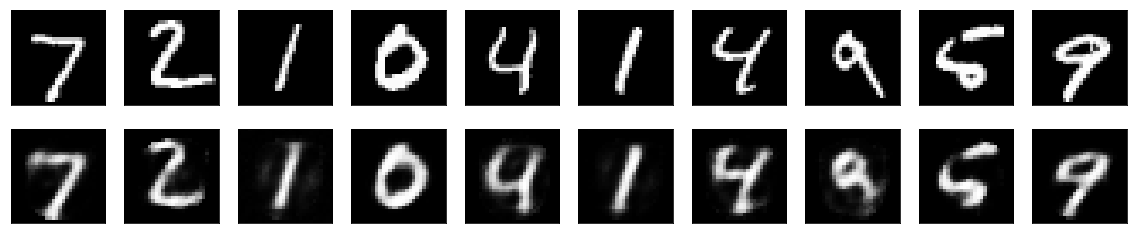

In [107]:
x_test = x_test/255
x_test = x_test.reshape(-1, 784)
img = sparse_autoencoder.predict(x_test)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
n = 10
plt.figure(figsize = (20,4))
for i in range(n):
    #displaying original
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #displaying predictions
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(img[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()